In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [70]:
#1. Image thresholding
def imgThresh(I, T):
    
    cols = I.shape[1]
    rows = I.shape[0]
    img_thresh = np.zeros([rows, cols], np.uint8)
    
    for i in range(rows):  
        for j in range(cols):
          
            if I[i,j] <  T: 
                img_thresh[i,j]= 0
            else:
                img_thresh[i,j] = 255
            
    cv2.imshow('thresh_image', img_thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [48]:
I = cv2.imread('eagle.jpg', 0)
cv2.imshow('thresh_image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
I1=cv2.imread('car.jpg')
I2=cv2.imread('eagle.jpg')

cv2.imshow('addition_image', I1+I2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
cv2.imshow('substracted_image', I1-I2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [28]:
I_add = cv2.add(I1, I2)
cv2.imshow('addition_image', I_add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
I_sub = cv2.subtract(I1, I2)
cv2.imshow('sub_image', I_sub)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
#3. Write simple programs to demonstrate
#a. Log transformation
def logTransform(I):
    
    c = 255 / np.log(1 + np.max(I))
    log_image = c * (np.log(I + 1))
    
    log_image = np.array(log_image, dtype = np.uint8)
    
    cv2.imshow('log_imag', log_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    
   


In [21]:
I = cv2.imread('car.jpg', 0)
logTransform(I)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [2]:
#b. Power transformation
#G is gamma value
def powerTrans(I, G):
    
    rows = I.shape[0]
    cols = I.shape[1]
    
    gamma_corrected_img = np.array(255*(I / 255) ** G, dtype = 'uint8')
    
    cv2.imshow('Gamma_img', gamma_corrected_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [5]:
I = cv2.imread('car.jpg')
powerTrans(I, 0.2)
print((I / 255)**0.2)

[[[0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  ...
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]]

 [[0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  ...
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]]

 [[0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  [0.89690058 0.89199919 0.89075685]
  ...
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]
  [0.88055952 0.87527842 0.87393802]]

 ...

 [[0.90755279 0.90288045 0.90169712]
  [0.90755279 0.90288045 0.90169712]
  [0.90755279 0.90288045 0.90169712]
  ...
  [0.89931164 0.89446332 0.89323466]
  [0.89931164 0.89446332 0.89323466]
  [0.89931164 0.89446332 0.89323466]]

 [[0.90755279 0.90288045 0.90169712]
  [0.90755279 0.90288045 0.90169712]


In [6]:
#c. Gray level slicing
#x, y the pixel value range to slice
def graylevelSlice(I, x, y):
    rows = I.shape[0]
    cols = I.shape[1]
    img_slice = np.zeros([rows, cols], np.uint8)
    
    for i in range(rows):  
        for j in range(cols):
          
            if (I[i,j] >= x) and (I[i,j] <= y): 
                img_slice[i,j]= 255
            else:
                img_slice[i,j] = 0
                
    cv2.imshow('img_slice', img_slice)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    

In [7]:
I = cv2.imread('car.jpg', 0)
graylevelSlice(I, 10, 50)


In [39]:
I = cv2.imread('eagle.jpg', 0)
print(I.size)
bitPlaneSlice(I)

921600
[0 0 0 ... 0 0 0]


In [23]:
#d. Bit plane slicing
def bitPlaneSlice(I):
    rows = I.shape[0]
    cols = I.shape[1]
    binary_img_value_list = []
    
    for i in range(rows):
        for j in range(cols):
            binary_img_value_list.append(np.binary_repr(I[i][j] ,width=8)) # width = no. of bits
 
    dim=(400,400) #dimention of output images(since there are 8 output images, it is impossible to display large 8 images)
    
    #getting the required layer bits from binary_img_value_list and reshaping the extracted values according to the original image size
    #The extracted bit values are multiplied with 2^(n-1) to get the pixel values and store the 8 images in a list
    img_list=[]
    for k in range(8):
        bitplane_img = cv2.resize((np.array([int(j[k]) for j in binary_img_value_list],dtype = np.uint8)*(2**(7-k))).reshape(rows,cols), dim, interpolation = cv2.INTER_AREA)
        img_list.append(bitplane_img)
    
    #Concatenate the 8 images, img_list[0] Bit 8 plane image, img_list[1] Bit 7 plane image, so on so forth
    higher_order = cv2.hconcat([img_list[0], img_list[1], img_list[2], img_list[3]])
    lower_order =cv2.hconcat([img_list[4], img_list[5], img_list[6], img_list[7]])
    final = cv2.vconcat([higher_order,lower_order])
    
    
    cv2.imshow('bit_plane_sliced_images',final)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [38]:
#d. Bit plane slicing
def bitPlaneSlice(I):
    rows = I.shape[0]
    cols = I.shape[1]
    binary_img_value_list = []
    
    for i in range(rows):
        for j in range(cols):
            binary_img_value_list.append(np.binary_repr(I[i][j] ,width=8)) # width = no. of bits
 
    dim=(400,400) #dimention of output images(since there are 8 output images, it is impossible to display large 8 images)
    
    #getting the required layer bits from binary_img_value_list and reshaping the extracted values according to the original image size
    #The extracted bit values are multiplied with 2^(n-1) to get the pixel values and store the 8 images in a list
    img_list=[]
    for k in range(8):
        bitplane_img =(np.array([int(j[k]) for j in binary_img_value_list],dtype = np.uint8)*(2**(7-k))).reshape(rows,cols)
        img_list.append(bitplane_img)
    
    #Concatenate the 8 images, img_list[0] Bit 8 plane image, img_list[1] Bit 7 plane image, so on so forth
    higher_order = cv2.hconcat([img_list[0], img_list[1], img_list[2], img_list[3]])
    print(img_list[0][689])
    lower_order =cv2.hconcat([img_list[4], img_list[5], img_list[6], img_list[7]])
    final = cv2.vconcat([higher_order,lower_order])
    
    
    cv2.imshow('bit_plane_sliced_images',final)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [27]:
I = cv2.imread('eagle.jpg',0)
bitPlaneSlice(I)

In [75]:
#4. Masking
def masking(I):        
    new_dim=(256, 256) #new dimention for resized image
    
    I_new = cv2.resize(I,new_dim)     # resizing the image
    
    #circle mask
    mask_circle = np.zeros([256, 256], dtype="uint8")  #np array to store the mask
    cv2.circle(mask_circle, (128, 128), 125, 125, -1)   #creating the mask
    circle_masked = cv2.bitwise_and(I_new, I_new, mask=mask_circle)  #adding mask to the image
    
    #rectangle mask
    mask_rect = np.zeros([256, 256], dtype="uint8")
    cv2.rectangle(mask_rect, (64, 192),(192, 64),255, -1)  #size of the part which shows the image is 128x128
    rect_masked = cv2.bitwise_and(I_new, I_new, mask=mask_rect)
    
    final_image = cv2.hconcat([I_new, rect_masked, circle_masked])  #concatinating the resized img, recatangular masked image and cricle masked image
    
    cv2.imshow('original image with masked images',final_image)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [43]:
I = cv2.imread('car.jpg')
masking(I)

In [76]:
#5. Brightness
#K is the scalar for increase the brightness
#I is the image
def addbrightness(I, K):
    rows = I.shape[0]
    cols = I.shape[1]
    
    brighten_img = np.zeros([rows, cols], dtype="uint8")
    
    for i in range(rows):
        for j in range(cols):
            img_val = I[i][j]
            new_val = img_val + K
            
            if(new_val > 255):
                brighten_img[i][j] = 255
            else:
                brighten_img[i][j] = new_val
    
    cv2.imshow('brightened_image', brighten_img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    

In [28]:
I = cv2.imread('car.jpg',0)
addbrightness(I, 100)

In [77]:
#6. Histogram
#Histogram Calculation in OpenCV
def calcHist(I, plotTitle):
    histogram = cv2.calcHist([I],[0],None,[256],[0,256]) 
    
    plt.plot(histogram)
    plt.title(plotTitle)
    plt.show()

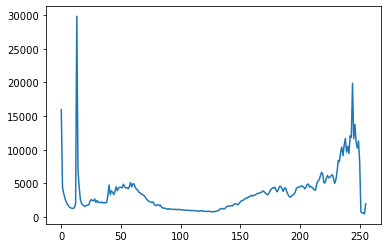

In [36]:
I = cv2.imread('car.jpg',0)
calcHist(I)

In [78]:
#Histogram Calculation in Numpy
def npHist(I, plotTitle):
    
    histogram, bin_array = np.histogram(I, bins=256)
    
    plt.plot(bin_array[0:-1], histogram)
    plt.title(plotTitle)
    plt.show()


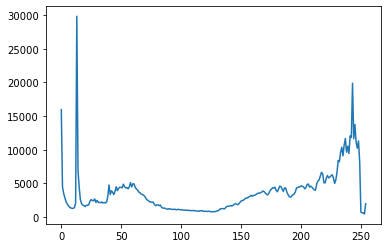

In [52]:
I = cv2.imread('car.jpg',0)
npHist(I)

In [79]:
#a. Show a histogram plot for a grayscale image.
def grayHist(I, plotTitle):
         
    #reshaping all the values to array
    I_array = I.reshape(1, I.shape[0]*I.shape[1])
    
    a = I_array[0] #getting array of pixel vales
    
    hist = {}     #creating dictionary to store the number pixel value as the key and the count of pixels as the key value
    
    #adding the count of pixel values
    for i in a:
        hist[i] = hist.get(i, 0) + 1
    
      
    #appending the 0 count value to which the pixels value are not present in the image
    for i in range(256):
        if ((i in hist) != True):
            hist[i] = 0
    
    #sorting the dictionary by the keys
    hist2 = sorted(hist.items())
  
        
    x= np.arange(start=0, stop = 256,step = 1)  #x axis values of the plot
    y= np.zeros([256], dtype='int')
    
    #adding the y axis values to an array
    for i in hist2:
        y[i[0]] = i[1]
    
    #plotting the histogram
    plt.plot(x, y)
    plt.title(plotTitle)
    plt.show()

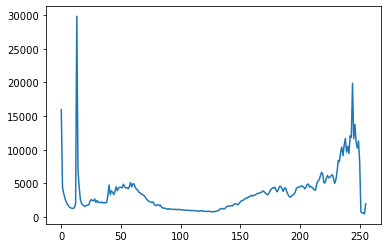

In [111]:
I = cv2.imread('car.jpg',0)
grayHist(I)

In [80]:
#b. Show three histograms for a given RGB image
def RGBhist(I):
    rows = I.shape[0]
    cols = I.shape[1]
    
    R = np.zeros([rows, cols], dtype="uint8")
    B = np.zeros([rows, cols], dtype="uint8")
    G = np.zeros([rows, cols], dtype="uint8")
    
    for i in range(rows):
        for j in range(cols):
            #since order of colour is BGR
            R[i][j] = I[i, j, 2]
            G[i][j] = I[i, j, 1]
            B[i][j] = I[i, j, 0]
            
    #since we have R, G, B values separetly we can use grayHist() funtion to get the plots
    
    grayHist(R, "Histogram For Red Colour")
    grayHist(G,"Histogram For Green Colour")
    grayHist(B, "Histogram For Blue Colour")

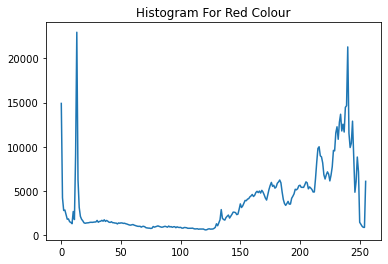

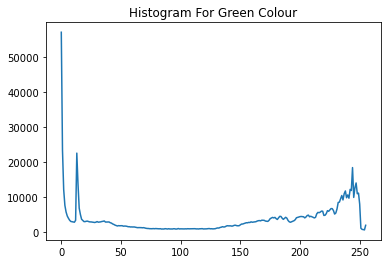

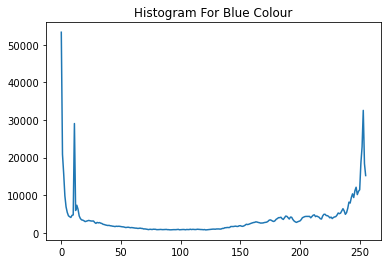

In [53]:
I = cv2.imread('car.jpg')
RGBhist(I)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


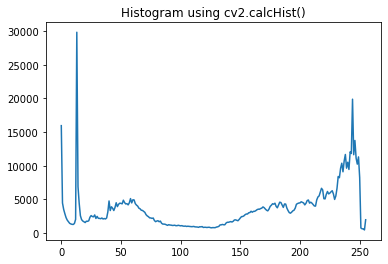

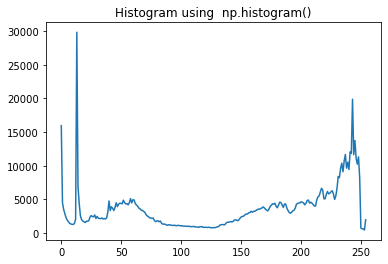

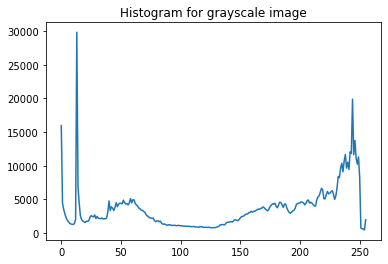

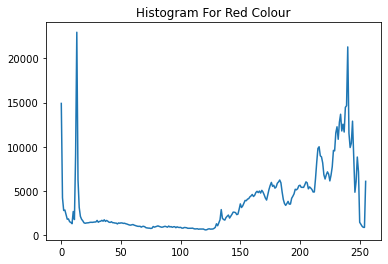

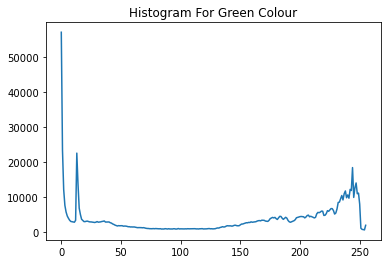

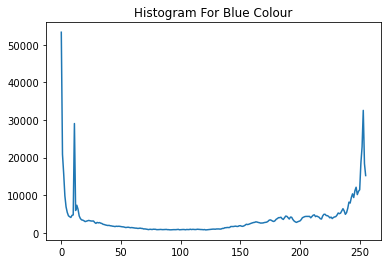

In [81]:
def main():
    I1_car = cv2.imread('car.jpg', 0)
    I2_color = cv2.imread('car.jpg')
    I3_eagle = cv2.imread('eagle.jpg', 0)
    I4_color = cv2.imread('eagle.jpg')
    
    #1. Image thresholding
    
    imgThresh(I1_car, 120)
    
    #2. Image arithmetic operations
    cv2.imshow('addition_image',I2_color+ I4_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    cv2.imshow('substract_image',I2_color- I4_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    I_add = cv2.add(I2_color, I4_color)
    cv2.imshow('cv_addition_image', I_add)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    I_sub = cv2.subtract(I2_color, I4_color)
    cv2.imshow('cv_subtract_image', I_sub)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #3. Write simple programs to demonstrate
    
    #a. Log transformation
    logTransform(I1_car)
    
    #b.Power transformation
    powerTrans(I1_car, 0.2)
    
    
    #c. Gray level slicing
    graylevelSlice(I1_car, 10, 100)
    
    #d. Bit plane slicing
    #starting from bit 8(MSB) plane image to bit 1 plane image(LSB)
    bitPlaneSlice(I1_car)
    
    
    #4. Masking
    masking(I2_color)
    
    
    #5. Brightness
    addbrightness(I1_car, 100)
    
    #6. Histogram
    
    #Histogram Calculation in OpenCV
    
    #Using inbuilt OpenCV cv2.calcHist()
    calcHist(I1_car, "Histogram using cv2.calcHist()")
    
    #Histogram Calculation in Numpy
    
    #Using np.histogram()
    npHist(I1_car, "Histogram using  np.histogram()")
    
    #a. Show a histogram plot for a grayscale image
    grayHist(I1_car, "Histogram for grayscale image")
    
    #b. Show three histograms for a given RGB image
    RGBhist(I2_color)
    
if __name__ == "__main__":
    main()